# IMPORTING PYTHON LIBRARIES

In [149]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# CREATING THE DATAFRAME

In [83]:
df=pd.read_csv("Zomato data .csv")
print(df)

                      name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            8

In [65]:
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


# CONVERTING THE DATA TYPE OF THE RATE COLUMN TO FLOAT AND REMOVING THE DENOMINATOR

In [114]:
def handleRate(value):
    value=str(value).split('/')
    value=value[0]
    return float(value)

df['rate']=df['rate'].apply(handleRate)
print(df.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


# SUMMARY OF THE DATAFRAME

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


# TYPE OF RESTAURANT

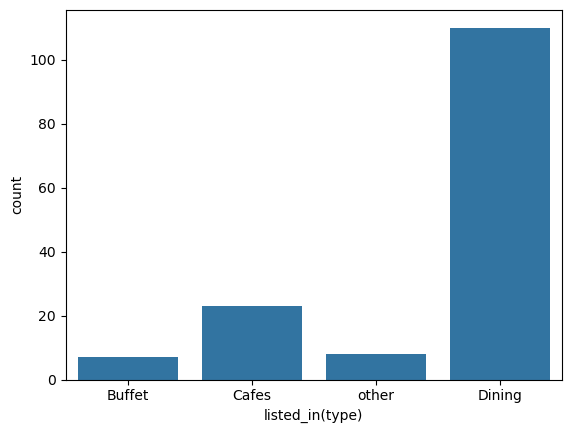

In [118]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel=("type of restaurants")              

# DINING RESTAURANTS ARE MOSTLY PREFERRED BY LARGE NUMBER OF INDIVIDUALS

TypeError: 'str' object is not callable

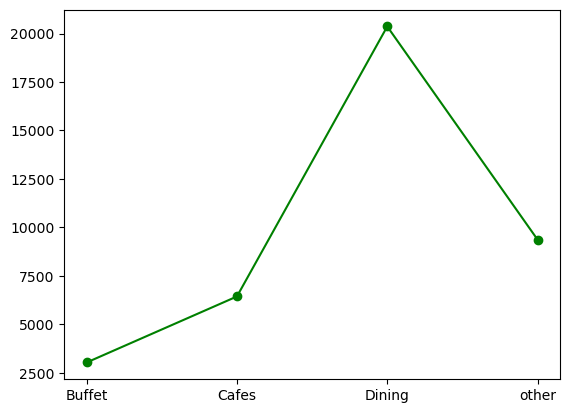

In [120]:
grouped_data=df.groupby("listed_in(type)")["votes"].sum()
result=pd.DataFrame({'votes':grouped_data})
plt.plot(result, c="g", marker="o")
plt.xlabel("Type of Restaurant", c="r", size=20)
plt.ylabel("Votes", c="r", size=20)

# THE MAJORITY OF RESTAURANTS RECEIVED RATINGS

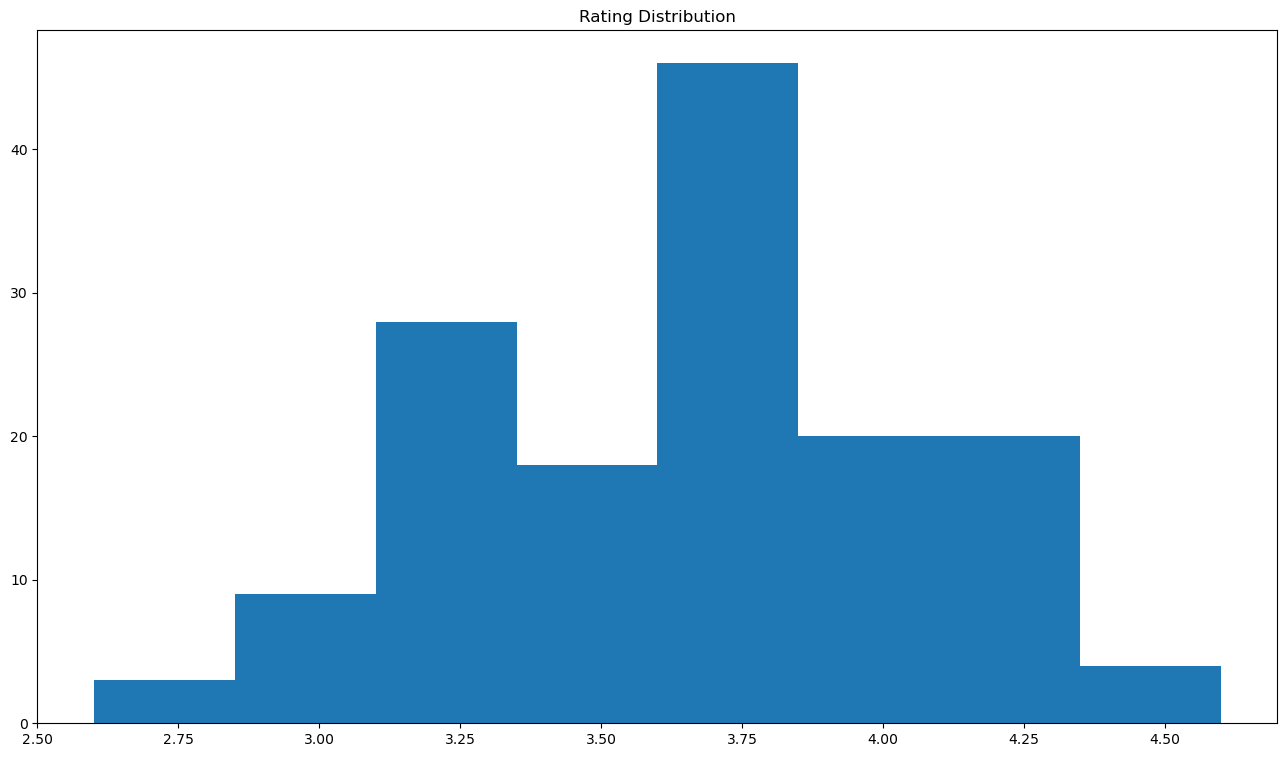

In [122]:
plt.figure(figsize=(16,9))
plt.hist(df['rate'], bins=8)
plt.title('Rating Distribution')
plt.show()

# THE MAJORITY OF COUPLES PREFER RESTAURANTS WITH AN APPROXIMATE COST OF 300 RUPEES.

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

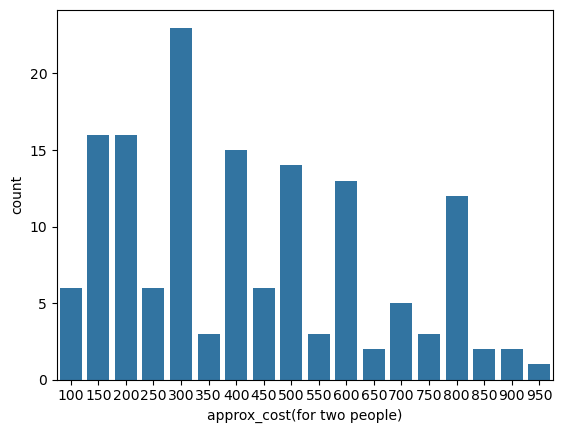

In [126]:
couple_data=df["approx_cost(for two people)"]
sns.countplot(x=couple_data)

# WHETHER ONLINE ORDERS RECEIVED HIGHER RATINGS THAN OFFLINE ORDERS.

<Axes: xlabel='online_order', ylabel='rate'>

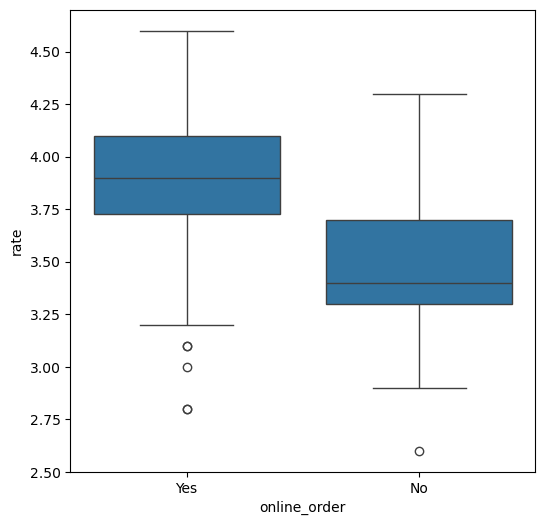

In [135]:
plt.figure(figsize=(6,6))
sns.boxplot(x="online_order", y="rate", data=df)

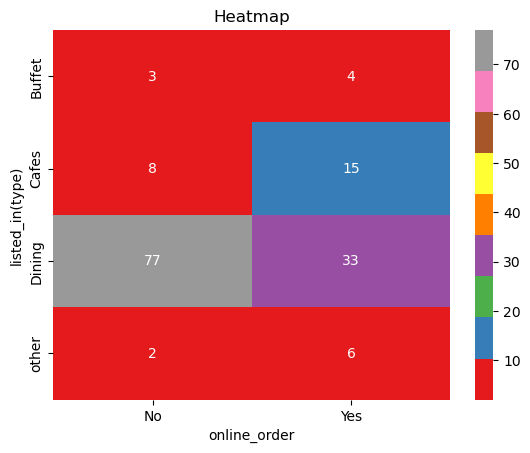

In [151]:
pivot_table=df.pivot_table(index="listed_in(type)", columns="online_order", aggfunc="size", fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='Set1', fmt="d")
plt.title("Heatmap")
plt.xlabel=("Online Order")
plt.ylabel=("listed_in(type)")
plt.show()